In [1]:
# STANDARDS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


In [2]:
# CUFFLINKS & PLOTLY
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_excel(r'C:\Users\krunk\OneDrive\Documents\CPSC 589\Dataset\BBS Dataset.xlsx',sheet_name='ReData')
df.head()

,Patient's Age,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,Item 11,Item 12,Item 13,Item 14,BBS Sum,Assessment of Risk
0,97,1,0,1,1,1,0,0,1,1,0,0,0,1,1,8,HIGH
1,88,2,0,1,4,3,2,2,3,4,0,1,0,4,4,30,MEDIUM
2,73,3,4,3,2,2,0,2,3,1,0,1,2,4,3,30,MEDIUM
3,77,2,3,1,0,4,4,2,0,1,1,0,2,3,1,24,MEDIUM
4,65,3,4,1,4,4,2,4,4,2,1,2,3,3,4,41,LOW


In [4]:
itemmax = pd.DataFrame(df[['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5',
       'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14']].max(),index=['Item 1', 'Item 2', 'Item 3', 'Item 4', 'Item 5',
       'Item 6', 'Item 7', 'Item 8', 'Item 9', 'Item 10', 'Item 11', 'Item 12',
       'Item 13', 'Item 14'],columns=['Item Highest Score'])
itemmax

,Item Highest Score
Item 1,4
Item 2,4
Item 3,4
Item 4,4
Item 5,4
Item 6,4
Item 7,4
Item 8,4
Item 9,4
Item 10,4


In [5]:
# SCIKIT SET
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report,confusion_matrix,silhouette_score,silhouette_samples
# NOTE: silhouette_score is average Silhouette score of each data point for each cluster

In [6]:
# MUST HAVE FORCED RANDOM STATES AND WILL HAVE TO CHECK CLUSTER CONVERTERS EVERY TIME

In [7]:
# RANDOM STATE = 101
# HIGH CENTER ~2.2 converter_value = 1
# MEDIUM CENTER ~0.3 converter_value = 0
# LOW CENTER ~0.9 converter_value = 2

In [8]:
# RANDOM STATE = 42
# HIGH CENTER ~2.2 converter_value = 1
# MEDIUM CENTER ~0.3 converter_value = 2
# LOW CENTER ~0.9 converter_value = 0

In [9]:
l = 0
m = 1
h = 2
#low_support = 108
#medium_support = 143
#high_support = 103
rs = 3717

In [10]:
def cluster_converter(cluster,l,m,h):
    if cluster == 'LOW':
        return l
    elif cluster == 'MEDIUM':
        return m
    else:
        return h

In [11]:
def revert_cluster(cluster):
    if cluster == l:
        return 'LOW'
    elif cluster == m:
        return 'MEDIUM'
    else:
        return 'HIGH'

In [12]:
"""def redef_lmh(df_,kl_):
    if confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,0] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[1,2] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[2,2]:
        h = 0
        if confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,1] & confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,2]:
            m = 1
            l = 2
        else:
            l = 1
            m = 2
    elif confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,2] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[1,0] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[2,0]:
        l = 0
        if confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,2]:
            m = 2
            h = 1
        else:
            m = 1
            h = 2
    else:
        m = 0
        if confusion_matrix(df_,kl_)[1,2] > confusion_matrix(df_,kl_)[1,0] & confusion_matrix(df_,kl_)[1,2] > confusion_matrix(df_,kl_)[1,1]:
            h = 1
            l = 2
        else:
            l = 1
            h = 2
    return l,m,h
"""

'def redef_lmh(df_,kl_):\n    if confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,0] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[1,2] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[2,2]:\n        h = 0\n        if confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,1] & confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,2]:\n            m = 1\n            l = 2\n        else:\n            l = 1\n            m = 2\n    elif confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,2] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[1,0] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[2,0]:\n        l = 0\n        if confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,2]:\n            m = 2\n    

In [13]:
"""def redef_lmh(df_,kl_):
    l = 0
    m = 1
    h = 2
    if confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,0]:
        h = 0
        if confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,1] & confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,2]:
            m = 2
            l = 1
        else:
            l = 2
            m = 1
    elif confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,2]:
        l = 0
        if confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,2]:
            m = 2
            h = 1
        else:
            m = 1
            h = 2
    elif confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,0] & confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,2]:
        m = 0
        if confusion_matrix(df_,kl_)[1,2] > confusion_matrix(df_,kl_)[1,0] & confusion_matrix(df_,kl_)[1,2] > confusion_matrix(df_,kl_)[1,1]:
            h = 1
            l = 2
        else:
            l = 1
            h = 2
    elif confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,1] & confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,2]:
        l = 1
        if confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,2]:
            m = 2
            h = 0
        else:
            m = 0
            h = 2
    elif confusion_matrix(df_,kl_)[1,1] > confusion_matrix(df_,kl_)[1,0] & confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,2]:
        m = 1
        if confusion_matrix(df_,kl_)[2,0] > confusion_matrix(df_,kl_)[2,1] & confusion_matrix(df_,kl_)[2,0] > confusion_matrix(df_,kl_)[2,2]:
            l = 2
            h = 0
        else:
            h = 2
            l = 0
    elif confusion_matrix(df_,kl_)[1,2] > confusion_matrix(df_,kl_)[1,0] & confusion_matrix(df_,kl_)[1,2] > confusion_matrix(df_,kl_)[1,1]:
        h = 1
        if confusion_matrix(df_,kl_)[2,0] > confusion_matrix(df_,kl_)[2,1] & confusion_matrix(df_,kl_)[2,0] > confusion_matrix(df_,kl_)[2,2]:
            l = 2
            m = 0
        else:
            l = 0
            m = 2
    elif confusion_matrix(df_,kl_)[2,0] > confusion_matrix(df_,kl_)[2,1] & confusion_matrix(df_,kl_)[2,0] > confusion_matrix(df_,kl_)[2,2]:
        l = 2
        if confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,0] & confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,2]:
            h = 1
            m = 0
        else:
            h = 0
            m = 1
    elif confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,2]:
        m = 2
        if confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,2]:
            h = 1
            l = 0
        else:
            h = 0
            l = 1
    elif confusion_matrix(df_,kl_)[2,2] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,2] > confusion_matrix(df_,kl_)[2,1]:
        h = 2
        if confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,2]:
            m = 1
            l = 0
        else:
            m = 0
            l = 1
    else:
        print('BAD_CHECK_ERROR')
    print('l =',l)
    print('m =',m)
    print('h =',h)
    return l,m,h
"""

"def redef_lmh(df_,kl_):\n    l = 0\n    m = 1\n    h = 2\n    if confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,2] > confusion_matrix(df_,kl_)[0,0]:\n        h = 0\n        if confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,1] & confusion_matrix(df_,kl_)[1,0] > confusion_matrix(df_,kl_)[1,2]:\n            m = 2\n            l = 1\n        else:\n            l = 2\n            m = 1\n    elif confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,1] & confusion_matrix(df_,kl_)[0,0] > confusion_matrix(df_,kl_)[0,2]:\n        l = 0\n        if confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,0] & confusion_matrix(df_,kl_)[2,1] > confusion_matrix(df_,kl_)[2,2]:\n            m = 2\n            h = 1\n        else:\n            m = 1\n            h = 2\n    elif confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,0] & confusion_matrix(df_,kl_)[0,1] > confusion_matrix(df_,kl_)[0,2]:\n        m = 0\n       

In [14]:
"""def redef_lmh(df_,kl_):
    if classification_report(df_,kl_,output_dict=True).get('1').get('support') == low_support:
        l = 1
        if classification_report(df_,kl_,output_dict=True).get('0').get('support') == medium_support:
            m = 0
            h = 2
        else:
            h = 0
            m = 2
    elif classification_report(df_,kl_,output_dict=True).get('2').get('support') == low_support:
        l = 2
        if classification_report(df_,kl_,output_dict=True).get(1).get('support') == medium_support:
            m = 1
            h = 0
        else:
            h = 1
            m = 0
    else:
        l = 0
        if classification_report(df_,kl_,output_dict=True).get('1').get('support') == medium_support:
            m = 1
            h = 2
        else:
            h = 1
            m = 2
    return l,m,h
"""

"def redef_lmh(df_,kl_):\n    if classification_report(df_,kl_,output_dict=True).get('1').get('support') == low_support:\n        l = 1\n        if classification_report(df_,kl_,output_dict=True).get('0').get('support') == medium_support:\n            m = 0\n            h = 2\n        else:\n            h = 0\n            m = 2\n    elif classification_report(df_,kl_,output_dict=True).get('2').get('support') == low_support:\n        l = 2\n        if classification_report(df_,kl_,output_dict=True).get(1).get('support') == medium_support:\n            m = 1\n            h = 0\n        else:\n            h = 1\n            m = 0\n    else:\n        l = 0\n        if classification_report(df_,kl_,output_dict=True).get('1').get('support') == medium_support:\n            m = 1\n            h = 2\n        else:\n            h = 1\n            m = 2\n    return l,m,h\n"

In [15]:
def do_roll(df_,kl_):
    cm_ = confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])
    if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][1] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][0]:
        if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][1] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][2]:
            cm_[0] = np.roll(cm_[0],2)
    if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][2] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][0]:
        if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][2] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[0][1]:
            cm_[0] = np.roll(cm_[0],1)
    
    if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][0] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][1]:
        if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][0] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][2]:
            cm_[1] = np.roll(cm_[1],1)
    if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][2] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][1]:
        if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][2] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[1][0]:
            cm_[1] = np.roll(cm_[1],2)
                
    if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][0] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][2]:
        if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][0] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][1]:
            cm_[2] = np.roll(cm_[2],2)
    if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][1] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][2]:
        if confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][1] > confusion_matrix(df_,kl_,labels=['LOW','MEDIUM','HIGH'])[2][0]:
            cm_[2] = np.roll(cm_[2],1)
    
    return cm_

In [16]:
def cm_classification_report(cm_,df_,kl_):
    
    #accuracy = everything correct on the confustion matrix / everything on the confusion matrix
    accuracy = (cm_[0,0] + cm_[1,1] + cm_[2,2]) / (cm_[0,0] + cm_[0,1] + cm_[0,2] + cm_[1,0] + cm_[1,1] + cm_[1,2] + cm_[2,0] + cm_[2,1] + cm_[2,2])
    
    # SUPPORT
    low_supp = classification_report(df_['Assessment of Risk'],kl_['Risk'],labels=['LOW','MEDIUM','HIGH'],output_dict=True).get('LOW').get('support')
    medium_supp = classification_report(df_['Assessment of Risk'],kl_['Risk'],labels=['LOW','MEDIUM','HIGH'],output_dict=True).get('MEDIUM').get('support')
    high_supp = classification_report(df_['Assessment of Risk'],kl_['Risk'],labels=['LOW','MEDIUM','HIGH'],output_dict=True).get('HIGH').get('support')
    macro_avg_supp = low_supp + medium_supp + high_supp
    weighted_avg_supp = low_supp + medium_supp + high_supp
    #support = pd.DataFrame([low_supp,medium_supp,high_supp,accuracy,macro_avg_supp,weighted_avg_supp],index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'],columns=['support'])
    support = pd.DataFrame({'support':[low_supp,medium_supp,high_supp,accuracy,macro_avg_supp,weighted_avg_supp]},index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'])
    
    # PRECISION
    low_p = cm_[0,0]/(cm_[0,0] + cm_[1,0] + cm_[2,0])
    medium_p = cm_[1,1]/(cm_[0,1] + cm_[1,1] + cm_[2,1])
    high_p = cm_[2,2]/(cm_[0,2] + cm_[1,2] + cm_[2,2])
    macro_avg_p = (low_p + medium_p + high_p) / cm.shape[0]
    weighted_avg_p = (low_p * low_supp + medium_p * medium_supp + high_p * high_supp) / (low_supp + medium_supp + high_supp)
    #precision = pd.DataFrame([low_p,medium_p,high_p,accuracy,macro_avg_p,weighted_avg_p],index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'],columns=['precision'])
    precision = pd.DataFrame({'precision':[low_p,medium_p,high_p,accuracy,macro_avg_p,weighted_avg_p]},index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'])
    
    
    # RECALL
    low_r = cm_[0,0]/(cm_[0,0] + cm_[0,1] + cm_[0,2])
    medium_r = cm_[1,1]/(cm_[1,0] + cm_[1,1] + cm_[1,2])
    high_r = cm_[2,2]/(cm_[2,0] + cm_[2,1] + cm_[2,2])
    macro_avg_r = (low_r + medium_r + high_r) / cm.shape[0]
    weighted_avg_r = (low_r * low_supp + medium_r * medium_supp + high_r * high_supp) / (low_supp + medium_supp + high_supp)
    #recall = pd.DataFrame([low_r,medium_r,high_r,accuracy,macro_avg_r,weighted_avg_r],index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'],columns=['recall'])
    recall = pd.DataFrame({'recall':[low_r,medium_r,high_r,accuracy,macro_avg_r,weighted_avg_r]},index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'])
    
    
    # F1-SCORE
    # F1 = 2 x (precision x recall)/(precision + recall)
    low_f1 = (2 * (low_p * low_r)) / (low_p + low_r)
    medium_f1 = (2 * (medium_p * medium_r)) / (medium_p + medium_r)
    high_f1 = (2 * (high_p * high_r)) / (high_p + high_r)
    macro_avg_f1 = (low_f1 + medium_f1 + high_f1) / cm.shape[0]
    weighted_avg_f1 = (low_f1 * low_supp + medium_f1 * medium_supp + high_f1 * high_supp) / (low_supp + medium_supp + high_supp)
    #f1_score = pd.DataFrame([low_f1,medium_f1,high_f1,accuracy,macro_avg_f1,weighted_avg_f1],index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'],columns=['f1-score'])
    f1_score = pd.DataFrame({'f1-score':[low_f1,medium_f1,high_f1,accuracy,macro_avg_f1,weighted_avg_f1]},index=['LOW','MEDIUM','HIGH','accuracy','macro avg','weighted avg'])
    
    
    return pd.concat([precision,recall,f1_score,support],axis=1)

In [17]:
# ALL ITEMS INCLUDED

In [18]:
X = df.drop(['Patient\'s Age','BBS Sum','Assessment of Risk'],axis=1)

In [19]:
#kmeans = KMeans(n_clusters=3,random_state=rs)
#kmeans.fit(X)
#df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
#kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
#kl['Risk'] = kl['Cluster'].apply(revert_cluster)
#kl['Risk'].value_counts()

In [20]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
#l,m,h = redef_lmh(df['Cluster'],kmeans.labels_)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
kl['Risk'].value_counts()

[[  0   0 108]
 [110   7  26]
 [  0 103   0]]


HIGH      134
MEDIUM    110
LOW       110
Name: Risk, dtype: int64

In [21]:
kmeans.cluster_centers_

array([[3.08181818, 3.27272727, 3.43636364, 3.08181818, 2.87272727,
        2.48181818, 2.17272727, 1.88181818, 2.07272727, 1.94545455,
        1.65454545, 1.34545455, 1.41818182, 0.93636364],
       [2.35454545, 2.13636364, 1.97272727, 1.70909091, 1.30909091,
        1.04545455, 0.77272727, 0.66363636, 0.43636364, 0.32727273,
        0.24545455, 0.2       , 0.12727273, 0.13636364],
       [3.59701493, 3.82089552, 3.85820896, 3.6119403 , 3.61940299,
        3.37313433, 3.14925373, 3.09701493, 3.3358209 , 3.2238806 ,
        3.06716418, 2.68656716, 2.52238806, 2.26119403]])

In [22]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))
print(confusion_matrix(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
print(classification_report(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])

[[  0   0 108]
 [110   7  26]
 [  0 103   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.06      0.05      0.06       143
           2       0.00      0.00      0.00       103

    accuracy                           0.02       354
   macro avg       0.02      0.02      0.02       354
weighted avg       0.03      0.02      0.02       354

[[  0   0 108]
 [110   7  26]
 [  0 103   0]]
              precision    recall  f1-score   support

         LOW       0.00      0.00      0.00       108
      MEDIUM       0.06      0.05      0.06       143
        HIGH       0.00      0.00      0.00       103

    accuracy                           0.02       354
   macro avg       0.02      0.02      0.02       354
weighted avg       0.03      0.02      0.02       354



In [23]:
#ex1 = pd.concat([pd.DataFrame(confusion_matrix(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']),index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH']),
#pd.DataFrame(classification_report(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH'],output_dict=True)).transpose()],axis=1)
#ex1.set_index([['Original','Original','Original','Original','Original','Original'],ex1.index],inplace=True)
#ex1

In [24]:
ex1 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex1.set_index([['Original','Original','Original','Original','Original','Original'],ex1.index],inplace=True)
ex1

LOW  MEDIUM   HIGH  precision    recall  f1-score  \
Original LOW           108.0     0.0    0.0   0.805970  1.000000  0.892562   
         MEDIUM         26.0   110.0    7.0   1.000000  0.769231  0.869565   
         HIGH            0.0     0.0  103.0   0.936364  1.000000  0.967136   
         accuracy        NaN     NaN    NaN   0.906780  0.906780  0.906780   
         macro avg       NaN     NaN    NaN   0.914111  0.923077  0.909754   
         weighted avg    NaN     NaN    NaN   0.922289  0.906780  0.904970   

                         support  
Original LOW           108.00000  
         MEDIUM        143.00000  
         HIGH          103.00000  
         accuracy        0.90678  
         macro avg     354.00000  
         weighted avg  354.00000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

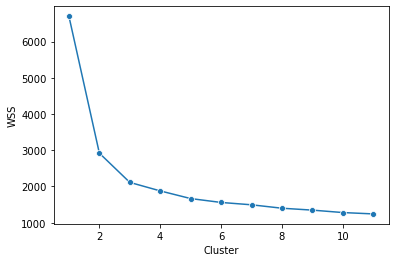

In [25]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [26]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.45694915415699394
Silhouette score from k(clusters) = 3 is 0.3369593899464535
Silhouette score from k(clusters) = 4 is 0.284612614541978
Silhouette score from k(clusters) = 5 is 0.22471747860609262
Silhouette score from k(clusters) = 6 is 0.2202607166589511
Silhouette score from k(clusters) = 7 is 0.19607156835040926
Silhouette score from k(clusters) = 8 is 0.20147160062251557
Silhouette score from k(clusters) = 9 is 0.16892447347106515
Silhouette score from k(clusters) = 10 is 0.18330255887809851
Silhouette score from k(clusters) = 11 is 0.18191984126136918
Silhouette score from k(clusters) = 12 is 0.17653346477811221


In [27]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 0
This Many Clusters: 3 | Number of Negative Values: 4
This Many Clusters: 4 | Number of Negative Values: 7
This Many Clusters: 5 | Number of Negative Values: 8
This Many Clusters: 6 | Number of Negative Values: 10
This Many Clusters: 7 | Number of Negative Values: 12
This Many Clusters: 8 | Number of Negative Values: 8
This Many Clusters: 9 | Number of Negative Values: 43
This Many Clusters: 10 | Number of Negative Values: 17
This Many Clusters: 11 | Number of Negative Values: 19
This Many Clusters: 12 | Number of Negative Values: 33


In [28]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [29]:
# HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)

In [30]:
X = df[['Item 5','Item 9','Item 10','Item 11']]
text = 'HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)'

In [31]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])
kl['Risk'].value_counts()

[[  0 105   3]
 [ 11  41  91]
 [101   0   2]]


MEDIUM    146
LOW       112
HIGH       96
Name: Risk, dtype: int64

In [32]:
kmeans.cluster_centers_

array([[1.35714286, 0.41071429, 0.30357143, 0.22321429],
       [3.56164384, 3.32876712, 3.20547945, 2.99315068],
       [2.84375   , 1.98958333, 1.875     , 1.64583333]])

In [33]:
ex6 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex6.set_index([[text,text,text,text,text,text],ex6.index],inplace=True)
ex6

LOW  MEDIUM  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           105.0     3.0   
                                                 MEDIUM         41.0    91.0   
                                                 HIGH            0.0     2.0   
                                                 accuracy        NaN     NaN   
                                                 macro avg       NaN     NaN   
                                                 weighted avg    NaN     NaN   

                                                                HIGH  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW             0.0   
                                                 MEDIUM         11.0   
                                                 HIGH          101.0   
                                                 accuracy        NaN   
                                                 macro avg       NaN   
                                                 weighted avg    NaN   

                                                               precision  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW            0.719178   
                                                 MEDIUM         0.947917   
                                                 HIGH           0.901786   
                                                 accuracy       0.838983   
                                                 macro avg      0.856293   
                                                 weighted avg   0.864710   

                                                                 recall  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           0.972222   
                                                 MEDIUM        0.636364   
                                                 HIGH          0.980583   
                                                 accuracy      0.838983   
                                                 macro avg     0.863056   
                                                 weighted avg  0.838983   

                                                               f1-score  \
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           0.826772   
                                                 MEDIUM        0.761506   
                                                 HIGH          0.939535   
                                                 accuracy      0.838983   
                                                 macro avg     0.842604   
                                                 weighted avg  0.833217   

                                                                  support  
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS) LOW           108.000000  
                                                 MEDIUM        143.000000  
                                                 HIGH          103.000000  
                                                 accuracy        0.838983  
                                                 macro avg     354.000000  
                                                 weighted avg  354.000000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

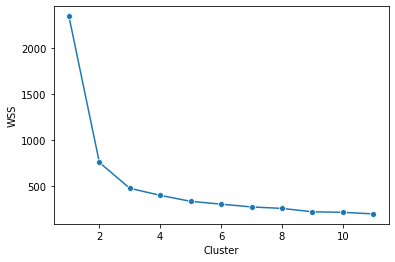

In [34]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [35]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.5595705824480435
Silhouette score from k(clusters) = 3 is 0.44867450222903094
Silhouette score from k(clusters) = 4 is 0.38127825191243725
Silhouette score from k(clusters) = 5 is 0.35019719525985604
Silhouette score from k(clusters) = 6 is 0.35271482828129513
Silhouette score from k(clusters) = 7 is 0.37200380850446874
Silhouette score from k(clusters) = 8 is 0.3755510056364719
Silhouette score from k(clusters) = 9 is 0.4068933783650045
Silhouette score from k(clusters) = 10 is 0.4004270145707253
Silhouette score from k(clusters) = 11 is 0.4341656465582605
Silhouette score from k(clusters) = 12 is 0.4584190901361392


In [36]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 0
This Many Clusters: 3 | Number of Negative Values: 0
This Many Clusters: 4 | Number of Negative Values: 7
This Many Clusters: 5 | Number of Negative Values: 4
This Many Clusters: 6 | Number of Negative Values: 4
This Many Clusters: 7 | Number of Negative Values: 15
This Many Clusters: 8 | Number of Negative Values: 11
This Many Clusters: 9 | Number of Negative Values: 4
This Many Clusters: 10 | Number of Negative Values: 5
This Many Clusters: 11 | Number of Negative Values: 2
This Many Clusters: 12 | Number of Negative Values: 2


In [37]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [38]:
# HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)

In [39]:
X = df[['Item 5','Item 8','Item 9','Item 10','Item 11']]

In [40]:
#kmeans = KMeans(n_clusters=3,random_state=rs)
#kmeans.fit(X)
#df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
#kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
#kl['Risk'] = kl['Cluster'].apply(revert_cluster)
#kl['Risk'].value_counts()

In [41]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
#l,m,h = redef_lmh(df['Cluster'],kmeans.labels_)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
kl['Risk'].value_counts()

[[  1   0 107]
 [111   5  27]
 [  2 101   0]]


HIGH      134
LOW       114
MEDIUM    106
Name: Risk, dtype: int64

In [42]:
kmeans.cluster_centers_

array([[2.79824561, 1.89473684, 2.04385965, 1.92105263, 1.6754386 ],
       [1.32075472, 0.60377358, 0.38679245, 0.27358491, 0.17924528],
       [3.62686567, 3.09701493, 3.35074627, 3.23880597, 3.05970149]])

In [43]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))
print(confusion_matrix(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
print(classification_report(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])

[[  1   0 107]
 [111   5  27]
 [  2 101   0]]
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       108
           1       0.05      0.03      0.04       143
           2       0.00      0.00      0.00       103

    accuracy                           0.02       354
   macro avg       0.02      0.01      0.02       354
weighted avg       0.02      0.02      0.02       354

[[  1   0 107]
 [111   5  27]
 [  2 101   0]]
              precision    recall  f1-score   support

         LOW       0.01      0.01      0.01       108
      MEDIUM       0.05      0.03      0.04       143
        HIGH       0.00      0.00      0.00       103

    accuracy                           0.02       354
   macro avg       0.02      0.01      0.02       354
weighted avg       0.02      0.02      0.02       354



In [44]:
ex2 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex2.set_index([['HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)','HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS)'],ex2.index],inplace=True)
ex2

LOW  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           107.0   
                                                   MEDIUM         27.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 MEDIUM  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW              1.0   
                                                   MEDIUM         111.0   
                                                   HIGH             2.0   
                                                   accuracy         NaN   
                                                   macro avg        NaN   
                                                   weighted avg     NaN   

                                                                  HIGH  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW             0.0   
                                                   MEDIUM          5.0   
                                                   HIGH          101.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 precision  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW            0.798507   
                                                   MEDIUM         0.973684   
                                                   HIGH           0.952830   
                                                   accuracy       0.901130   
                                                   macro avg      0.908341   
                                                   weighted avg   0.914173   

                                                                   recall  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           0.990741   
                                                   MEDIUM        0.776224   
                                                   HIGH          0.980583   
                                                   accuracy      0.901130   
                                                   macro avg     0.915849   
                                                   weighted avg  0.901130   

                                                                 f1-score  \
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           0.884298   
                                                   MEDIUM        0.863813   
                                                   HIGH          0.966507   
                                                   accuracy      0.901130   
                                                   macro avg     0.904873   
                                                   weighted avg  0.899943   

                                                                   support  
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           108.00000  
                                                   MEDIUM        143.00000  
                                                   HIGH          103.00000  
                                                   accuracy        0.90113  
                                                   macro avg     354.00000  
                                                   weighted avg  354.00000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

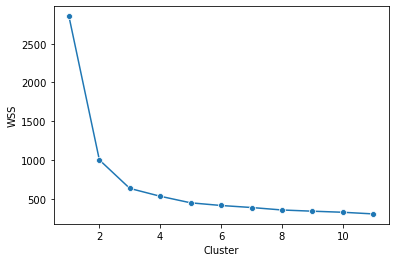

In [45]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [46]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.5216989639023528
Silhouette score from k(clusters) = 3 is 0.4219362994930373
Silhouette score from k(clusters) = 4 is 0.34997095769588266
Silhouette score from k(clusters) = 5 is 0.3224200631266991
Silhouette score from k(clusters) = 6 is 0.309982387739611
Silhouette score from k(clusters) = 7 is 0.2869663340287191
Silhouette score from k(clusters) = 8 is 0.2964428085937791
Silhouette score from k(clusters) = 9 is 0.2860600060430079
Silhouette score from k(clusters) = 10 is 0.2951553250554099
Silhouette score from k(clusters) = 11 is 0.32061129812230105
Silhouette score from k(clusters) = 12 is 0.3075559944794411


In [47]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 0
This Many Clusters: 3 | Number of Negative Values: 1
This Many Clusters: 4 | Number of Negative Values: 2
This Many Clusters: 5 | Number of Negative Values: 1
This Many Clusters: 6 | Number of Negative Values: 2
This Many Clusters: 7 | Number of Negative Values: 11
This Many Clusters: 8 | Number of Negative Values: 3
This Many Clusters: 9 | Number of Negative Values: 3
This Many Clusters: 10 | Number of Negative Values: 6
This Many Clusters: 11 | Number of Negative Values: 3
This Many Clusters: 12 | Number of Negative Values: 7


In [48]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [49]:
# HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)

In [50]:
X = df[['Item 5','Item 7','Item 8','Item 9','Item 10','Item 11']]

In [51]:
#kmeans = KMeans(n_clusters=3,random_state=rs)
#kmeans.fit(X)
#df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
#kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
#kl['Risk'] = kl['Cluster'].apply(revert_cluster)
#kl['Risk'].value_counts()

In [52]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
#l,m,h = redef_lmh(df['Cluster'],kmeans.labels_)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
kl['Risk'].value_counts()

[[  0 108   0]
 [  3  28 112]
 [101   0   2]]


MEDIUM    136
HIGH      114
LOW       104
Name: Risk, dtype: int64

In [53]:
kmeans.cluster_centers_

array([[1.28846154, 0.73076923, 0.60576923, 0.375     , 0.25961538,
        0.17307692],
       [3.625     , 3.13970588, 3.09558824, 3.33088235, 3.22058824,
        3.05147059],
       [2.78947368, 2.13157895, 1.85087719, 2.02631579, 1.90350877,
        1.64035088]])

In [54]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))
print(confusion_matrix(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
print(classification_report(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])

[[  0 108   0]
 [  3  28 112]
 [101   0   2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.21      0.20      0.20       143
           2       0.02      0.02      0.02       103

    accuracy                           0.08       354
   macro avg       0.07      0.07      0.07       354
weighted avg       0.09      0.08      0.09       354

[[  0 108   0]
 [  3  28 112]
 [101   0   2]]
              precision    recall  f1-score   support

         LOW       0.00      0.00      0.00       108
      MEDIUM       0.21      0.20      0.20       143
        HIGH       0.02      0.02      0.02       103

    accuracy                           0.08       354
   macro avg       0.07      0.07      0.07       354
weighted avg       0.09      0.08      0.09       354



In [55]:
ex3 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex3.set_index([['HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)','HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL ITEMS)'],ex3.index],inplace=True)
ex3

LOW  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           108.0   
                                                   MEDIUM         28.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 MEDIUM  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW              0.0   
                                                   MEDIUM         112.0   
                                                   HIGH             2.0   
                                                   accuracy         NaN   
                                                   macro avg        NaN   
                                                   weighted avg     NaN   

                                                                  HIGH  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW             0.0   
                                                   MEDIUM          3.0   
                                                   HIGH          101.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 precision  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW            0.794118   
                                                   MEDIUM         0.982456   
                                                   HIGH           0.971154   
                                                   accuracy       0.906780   
                                                   macro avg      0.915909   
                                                   weighted avg   0.921708   

                                                                   recall  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           1.000000   
                                                   MEDIUM        0.783217   
                                                   HIGH          0.980583   
                                                   accuracy      0.906780   
                                                   macro avg     0.921266   
                                                   weighted avg  0.906780   

                                                                 f1-score  \
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           0.885246   
                                                   MEDIUM        0.871595   
                                                   HIGH          0.975845   
                                                   accuracy      0.906780   
                                                   macro avg     0.910896   
                                                   weighted avg  0.906093   

                                                                   support  
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           108.00000  
                                                   MEDIUM        143.00000  
                                                   HIGH          103.00000  
                                                   accuracy        0.90678  
                                                   macro avg     354.00000  
                                                   weighted avg  354.00000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

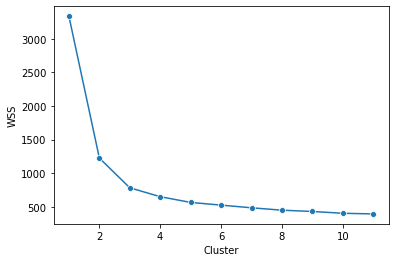

In [56]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [57]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.5201783702535393
Silhouette score from k(clusters) = 3 is 0.40857528942953586
Silhouette score from k(clusters) = 4 is 0.34769447395378605
Silhouette score from k(clusters) = 5 is 0.2978713118663313
Silhouette score from k(clusters) = 6 is 0.2821192622691965
Silhouette score from k(clusters) = 7 is 0.28438905650194385
Silhouette score from k(clusters) = 8 is 0.27561210389362095
Silhouette score from k(clusters) = 9 is 0.27156184752372825
Silhouette score from k(clusters) = 10 is 0.27484528301530986
Silhouette score from k(clusters) = 11 is 0.2774586639239947
Silhouette score from k(clusters) = 12 is 0.2880084870041832


In [58]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 0
This Many Clusters: 3 | Number of Negative Values: 1
This Many Clusters: 4 | Number of Negative Values: 0
This Many Clusters: 5 | Number of Negative Values: 1
This Many Clusters: 6 | Number of Negative Values: 12
This Many Clusters: 7 | Number of Negative Values: 15
This Many Clusters: 8 | Number of Negative Values: 16
This Many Clusters: 9 | Number of Negative Values: 10
This Many Clusters: 10 | Number of Negative Values: 20
This Many Clusters: 11 | Number of Negative Values: 8
This Many Clusters: 12 | Number of Negative Values: 10


In [59]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [60]:
# DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)

In [61]:
X = df[['Item 4','Item 8','Item 10','Item 11','Item 12','Item 14']]

In [62]:
#kmeans = KMeans(n_clusters=3,random_state=rs)
#kmeans.fit(X)
#df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
#kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
#kl['Risk'] = kl['Cluster'].apply(revert_cluster)
#kl['Risk'].value_counts()

In [63]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
#l,m,h = redef_lmh(df['Cluster'],kmeans.labels_)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
kl['Risk'].value_counts()

[[  0 103   5]
 [ 13  24 106]
 [100   0   3]]


MEDIUM    127
HIGH      114
LOW       113
Name: Risk, dtype: int64

In [64]:
kmeans.cluster_centers_

array([[1.77876106, 0.65486726, 0.32743363, 0.20353982, 0.16814159,
        0.11504425],
       [3.60629921, 3.11811024, 3.26771654, 3.11023622, 2.73228346,
        2.30708661],
       [3.0877193 , 1.97368421, 2.01754386, 1.77192982, 1.43859649,
        1.00877193]])

In [65]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))
print(confusion_matrix(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
print(classification_report(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])

[[  0 103   5]
 [ 13  24 106]
 [100   0   3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       108
           1       0.19      0.17      0.18       143
           2       0.03      0.03      0.03       103

    accuracy                           0.08       354
   macro avg       0.07      0.07      0.07       354
weighted avg       0.08      0.08      0.08       354

[[  0 103   5]
 [ 13  24 106]
 [100   0   3]]
              precision    recall  f1-score   support

         LOW       0.00      0.00      0.00       108
      MEDIUM       0.19      0.17      0.18       143
        HIGH       0.03      0.03      0.03       103

    accuracy                           0.08       354
   macro avg       0.07      0.07      0.07       354
weighted avg       0.08      0.08      0.08       354



In [66]:
ex4 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex4.set_index([['DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)','DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)'],ex4.index],inplace=True)
ex4

LOW  MEDIUM  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           103.0     5.0   
                                                  MEDIUM         24.0   106.0   
                                                  HIGH            0.0     3.0   
                                                  accuracy        NaN     NaN   
                                                  macro avg       NaN     NaN   
                                                  weighted avg    NaN     NaN   

                                                                 HIGH  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW             0.0   
                                                  MEDIUM         13.0   
                                                  HIGH          100.0   
                                                  accuracy        NaN   
                                                  macro avg       NaN   
                                                  weighted avg    NaN   

                                                                precision  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW            0.811024   
                                                  MEDIUM         0.929825   
                                                  HIGH           0.884956   
                                                  accuracy       0.872881   
                                                  macro avg      0.875268   
                                                  weighted avg   0.880525   

                                                                  recall  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           0.953704   
                                                  MEDIUM        0.741259   
                                                  HIGH          0.970874   
                                                  accuracy      0.872881   
                                                  macro avg     0.888612   
                                                  weighted avg  0.872881   

                                                                f1-score  \
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           0.876596   
                                                  MEDIUM        0.824903   
                                                  HIGH          0.925926   
                                                  accuracy      0.872881   
                                                  macro avg     0.875808   
                                                  weighted avg  0.870067   

                                                                   support  
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS) LOW           108.000000  
                                                  MEDIUM        143.000000  
                                                  HIGH          103.000000  
                                                  accuracy        0.872881  
                                                  macro avg     354.000000  
                                                  weighted avg  354.000000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

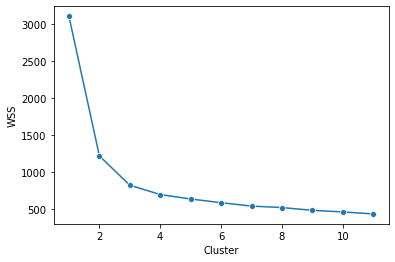

In [67]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [68]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.48414289234780156
Silhouette score from k(clusters) = 3 is 0.3890747672855522
Silhouette score from k(clusters) = 4 is 0.3245917926285587
Silhouette score from k(clusters) = 5 is 0.2715979005533585
Silhouette score from k(clusters) = 6 is 0.2592637530082387
Silhouette score from k(clusters) = 7 is 0.2633873690353149
Silhouette score from k(clusters) = 8 is 0.2587989994122972
Silhouette score from k(clusters) = 9 is 0.26124433848462114
Silhouette score from k(clusters) = 10 is 0.2578090250955093
Silhouette score from k(clusters) = 11 is 0.2756321763969419
Silhouette score from k(clusters) = 12 is 0.2652757051418099


In [69]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 0
This Many Clusters: 3 | Number of Negative Values: 0
This Many Clusters: 4 | Number of Negative Values: 16
This Many Clusters: 5 | Number of Negative Values: 7
This Many Clusters: 6 | Number of Negative Values: 7
This Many Clusters: 7 | Number of Negative Values: 8
This Many Clusters: 8 | Number of Negative Values: 14
This Many Clusters: 9 | Number of Negative Values: 6
This Many Clusters: 10 | Number of Negative Values: 6
This Many Clusters: 11 | Number of Negative Values: 8
This Many Clusters: 12 | Number of Negative Values: 6


In [70]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [71]:
# HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)

In [72]:
X = df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11']]

In [73]:
#kmeans = KMeans(n_clusters=3,random_state=rs)
#kmeans.fit(X)
#df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
#kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
#kl['Risk'] = kl['Cluster'].apply(revert_cluster)
#kl['Risk'].value_counts()

In [74]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
#l,m,h = redef_lmh(df['Cluster'],kmeans.labels_)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
kl['Risk'].value_counts()

[[107   0   1]
 [ 28   4 111]
 [  0 101   2]]


LOW       135
HIGH      114
MEDIUM    105
Name: Risk, dtype: int64

In [75]:
kmeans.cluster_centers_

array([[3.62222222, 3.37037037, 3.13333333, 3.08888889, 3.34074074,
        3.23703704, 3.05925926],
       [1.2952381 , 1.        , 0.74285714, 0.62857143, 0.38095238,
        0.25714286, 0.18095238],
       [2.80701754, 2.45614035, 2.14912281, 1.85964912, 2.03508772,
        1.9122807 , 1.64912281]])

In [76]:
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))
print(confusion_matrix(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
print(classification_report(df['Assessment of Risk'],kl['Risk'],labels=['LOW','MEDIUM','HIGH']))
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])

[[107   0   1]
 [ 28   4 111]
 [  0 101   2]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       108
           1       0.04      0.03      0.03       143
           2       0.02      0.02      0.02       103

    accuracy                           0.32       354
   macro avg       0.28      0.35      0.31       354
weighted avg       0.26      0.32      0.29       354

[[107   0   1]
 [ 28   4 111]
 [  0 101   2]]
              precision    recall  f1-score   support

         LOW       0.79      0.99      0.88       108
      MEDIUM       0.04      0.03      0.03       143
        HIGH       0.02      0.02      0.02       103

    accuracy                           0.32       354
   macro avg       0.28      0.35      0.31       354
weighted avg       0.26      0.32      0.29       354



In [77]:
ex5 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex5.set_index([['HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)','HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL ITEMS)'],ex5.index],inplace=True)
ex5

LOW  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           107.0   
                                                   MEDIUM          4.0   
                                                   HIGH            2.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 MEDIUM  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW              0.0   
                                                   MEDIUM         111.0   
                                                   HIGH             0.0   
                                                   accuracy         NaN   
                                                   macro avg        NaN   
                                                   weighted avg     NaN   

                                                                  HIGH  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW             1.0   
                                                   MEDIUM         28.0   
                                                   HIGH          101.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 precision  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW            0.946903   
                                                   MEDIUM         1.000000   
                                                   HIGH           0.776923   
                                                   accuracy       0.901130   
                                                   macro avg      0.907942   
                                                   weighted avg   0.918894   

                                                                   recall  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           0.990741   
                                                   MEDIUM        0.776224   
                                                   HIGH          0.980583   
                                                   accuracy      0.901130   
                                                   macro avg     0.915849   
                                                   weighted avg  0.901130   

                                                                 f1-score  \
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           0.968326   
                                                   MEDIUM        0.874016   
                                                   HIGH          0.866953   
                                                   accuracy      0.901130   
                                                   macro avg     0.903098   
                                                   weighted avg  0.900733   

                                                                   support  
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           108.00000  
                                                   MEDIUM        143.00000  
                                                   HIGH          103.00000  
                                                   accuracy        0.90113  
                                                   macro avg     354.00000  
                                                   weighted avg  354.00000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

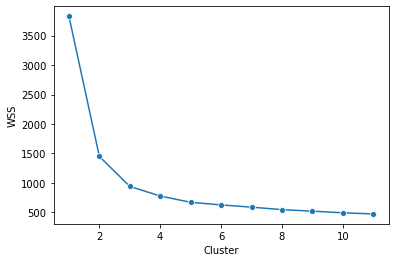

In [78]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [79]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.510092374978388
Silhouette score from k(clusters) = 3 is 0.3928630596830701
Silhouette score from k(clusters) = 4 is 0.3322565040260485
Silhouette score from k(clusters) = 5 is 0.29942557297769107
Silhouette score from k(clusters) = 6 is 0.27168844163523725
Silhouette score from k(clusters) = 7 is 0.26926985806924697
Silhouette score from k(clusters) = 8 is 0.2629268534851305
Silhouette score from k(clusters) = 9 is 0.2569875255308468
Silhouette score from k(clusters) = 10 is 0.26278865583749905
Silhouette score from k(clusters) = 11 is 0.2558864722526601
Silhouette score from k(clusters) = 12 is 0.26676285102648156


In [80]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 2
This Many Clusters: 3 | Number of Negative Values: 0
This Many Clusters: 4 | Number of Negative Values: 5
This Many Clusters: 5 | Number of Negative Values: 9
This Many Clusters: 6 | Number of Negative Values: 14
This Many Clusters: 7 | Number of Negative Values: 16
This Many Clusters: 8 | Number of Negative Values: 7
This Many Clusters: 9 | Number of Negative Values: 25
This Many Clusters: 10 | Number of Negative Values: 16
This Many Clusters: 11 | Number of Negative Values: 18
This Many Clusters: 12 | Number of Negative Values: 11


In [81]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [82]:
# HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TOTAL ITEMS)

In [83]:
X = df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12']]
text = 'HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TOTAL ITEMS)'

In [84]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])
kl['Risk'].value_counts()

[[  0 108   0]
 [111  27   5]
 [  2   0 101]]


MEDIUM    135
LOW       113
HIGH      106
Name: Risk, dtype: int64

In [85]:
kmeans.cluster_centers_

array([[2.81415929, 2.46017699, 2.14159292, 1.85840708, 2.04424779,
        1.9380531 , 1.65486726, 1.32743363],
       [3.62222222, 3.37037037, 3.14814815, 3.0962963 , 3.33333333,
        3.22222222, 3.05925926, 2.68148148],
       [1.30188679, 1.00943396, 0.74528302, 0.63207547, 0.39622642,
        0.26415094, 0.18867925, 0.16981132]])

In [86]:
ex7 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex7.set_index([[text,text,text,text,text,text],ex7.index],inplace=True)
ex7

LOW  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           108.0   
                                                   MEDIUM          5.0   
                                                   HIGH            2.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 MEDIUM  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW              0.0   
                                                   MEDIUM         111.0   
                                                   HIGH             0.0   
                                                   accuracy         NaN   
                                                   macro avg        NaN   
                                                   weighted avg     NaN   

                                                                  HIGH  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW             0.0   
                                                   MEDIUM         27.0   
                                                   HIGH          101.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 precision  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW            0.939130   
                                                   MEDIUM         1.000000   
                                                   HIGH           0.789062   
                                                   accuracy       0.903955   
                                                   macro avg      0.909398   
                                                   weighted avg   0.920055   

                                                                   recall  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           1.000000   
                                                   MEDIUM        0.776224   
                                                   HIGH          0.980583   
                                                   accuracy      0.903955   
                                                   macro avg     0.918935   
                                                   weighted avg  0.903955   

                                                                 f1-score  \
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           0.968610   
                                                   MEDIUM        0.874016   
                                                   HIGH          0.874459   
                                                   accuracy      0.903955   
                                                   macro avg     0.905695   
                                                   weighted avg  0.903004   

                                                                    support  
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           108.000000  
                                                   MEDIUM        143.000000  
                                                   HIGH          103.000000  
                                                   accuracy        0.903955  
                                                   macro avg     354.000000  
                                                   weighted avg  354.000000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

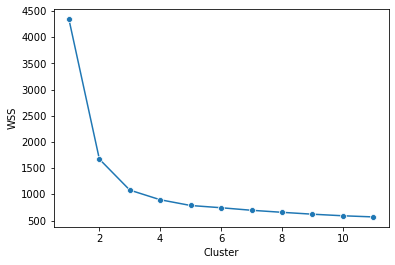

In [87]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [88]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.4907868517281662
Silhouette score from k(clusters) = 3 is 0.39072849013519945
Silhouette score from k(clusters) = 4 is 0.32938032679973456
Silhouette score from k(clusters) = 5 is 0.2879909172112601
Silhouette score from k(clusters) = 6 is 0.2474866847698616
Silhouette score from k(clusters) = 7 is 0.2416422568120516
Silhouette score from k(clusters) = 8 is 0.2402519506250639
Silhouette score from k(clusters) = 9 is 0.2328298801069498
Silhouette score from k(clusters) = 10 is 0.23848861586807985
Silhouette score from k(clusters) = 11 is 0.2371021608752191
Silhouette score from k(clusters) = 12 is 0.23202256583375655


In [89]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 2
This Many Clusters: 3 | Number of Negative Values: 0
This Many Clusters: 4 | Number of Negative Values: 9
This Many Clusters: 5 | Number of Negative Values: 12
This Many Clusters: 6 | Number of Negative Values: 9
This Many Clusters: 7 | Number of Negative Values: 18
This Many Clusters: 8 | Number of Negative Values: 14
This Many Clusters: 9 | Number of Negative Values: 18
This Many Clusters: 10 | Number of Negative Values: 25
This Many Clusters: 11 | Number of Negative Values: 14
This Many Clusters: 12 | Number of Negative Values: 13


In [90]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [91]:
# HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9 TOTAL ITEMS)

In [92]:
X = df[['Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12','Item 13']]
text = 'HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9 TOTAL ITEMS)'

In [93]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])
kl['Risk'].value_counts()

[[  0 108   0]
 [110  26   7]
 [  2   0 101]]


MEDIUM    134
LOW       112
HIGH      108
Name: Risk, dtype: int64

In [94]:
kmeans.cluster_centers_

array([[2.83035714, 2.45535714, 2.15178571, 1.875     , 2.08035714,
        1.95535714, 1.66964286, 1.375     , 1.42857143],
       [3.61940299, 3.37313433, 3.14925373, 3.09701493, 3.3358209 ,
        3.2238806 , 3.06716418, 2.68656716, 2.52238806],
       [1.32407407, 1.0462963 , 0.76851852, 0.64814815, 0.39814815,
        0.28703704, 0.2037037 , 0.14814815, 0.09259259]])

In [95]:
ex8 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex8.set_index([[text,text,text,text,text,text],ex8.index],inplace=True)
ex8

LOW  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           108.0   
                                                   MEDIUM          7.0   
                                                   HIGH            2.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 MEDIUM  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW              0.0   
                                                   MEDIUM         110.0   
                                                   HIGH             0.0   
                                                   accuracy         NaN   
                                                   macro avg        NaN   
                                                   weighted avg     NaN   

                                                                  HIGH  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW             0.0   
                                                   MEDIUM         26.0   
                                                   HIGH          101.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 precision  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW            0.923077   
                                                   MEDIUM         1.000000   
                                                   HIGH           0.795276   
                                                   accuracy       0.901130   
                                                   macro avg      0.906118   
                                                   weighted avg   0.916965   

                                                                   recall  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           1.000000   
                                                   MEDIUM        0.769231   
                                                   HIGH          0.980583   
                                                   accuracy      0.901130   
                                                   macro avg     0.916604   
                                                   weighted avg  0.901130   

                                                                 f1-score  \
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           0.960000   
                                                   MEDIUM        0.869565   
                                                   HIGH          0.878261   
                                                   accuracy      0.901130   
                                                   macro avg     0.902609   
                                                   weighted avg  0.899686   

                                                                   support  
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           108.00000  
                                                   MEDIUM        143.00000  
                                                   HIGH          103.00000  
                                                   accuracy        0.90113  
                                                   macro avg     354.00000  
                                                   weighted avg  354.00000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

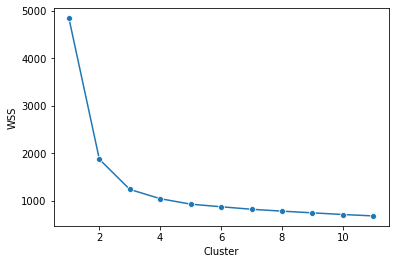

In [96]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [97]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.4935714568054904
Silhouette score from k(clusters) = 3 is 0.38687141214782766
Silhouette score from k(clusters) = 4 is 0.32518937419174304
Silhouette score from k(clusters) = 5 is 0.27534221254935803
Silhouette score from k(clusters) = 6 is 0.2538658618387879
Silhouette score from k(clusters) = 7 is 0.23056664167024515
Silhouette score from k(clusters) = 8 is 0.2263395623654868
Silhouette score from k(clusters) = 9 is 0.23537798954087838
Silhouette score from k(clusters) = 10 is 0.22465776641972934
Silhouette score from k(clusters) = 11 is 0.23446182675839292
Silhouette score from k(clusters) = 12 is 0.22584507325761696


In [98]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 0
This Many Clusters: 3 | Number of Negative Values: 0
This Many Clusters: 4 | Number of Negative Values: 7
This Many Clusters: 5 | Number of Negative Values: 9
This Many Clusters: 6 | Number of Negative Values: 5
This Many Clusters: 7 | Number of Negative Values: 16
This Many Clusters: 8 | Number of Negative Values: 13
This Many Clusters: 9 | Number of Negative Values: 15
This Many Clusters: 10 | Number of Negative Values: 12
This Many Clusters: 11 | Number of Negative Values: 13
This Many Clusters: 12 | Number of Negative Values: 19


In [99]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [100]:
# HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4 (10 TOTAL ITEMS)

In [101]:
X = df[['Item 4','Item 5','Item 6','Item 7','Item 8','Item 9','Item 10','Item 11','Item 12','Item 13']]
text = 'HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4 (10 TOTAL ITEMS)'

In [102]:
kmeans = KMeans(n_clusters=3,random_state=rs)
kmeans.fit(X)
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
print(confusion_matrix(df['Cluster'],kmeans.labels_))
df['Cluster'] = df['Assessment of Risk'].apply(lambda x: cluster_converter(x,l,m,h))
kl = pd.DataFrame(kmeans.labels_,columns=['Cluster'])
kl['Risk'] = kl['Cluster'].apply(revert_cluster)
cm = do_roll(df['Assessment of Risk'],kl['Risk'])
dfcm = pd.DataFrame(cm,index=['LOW','MEDIUM','HIGH'],columns=['LOW','MEDIUM','HIGH'])
kl['Risk'].value_counts()

[[108   0   0]
 [ 27   7 109]
 [  0 102   1]]


LOW       135
HIGH      110
MEDIUM    109
Name: Risk, dtype: int64

In [103]:
kmeans.cluster_centers_

array([[3.61481481, 3.62222222, 3.37037037, 3.14814815, 3.0962963 ,
        3.33333333, 3.22222222, 3.05925926, 2.68148148, 2.5037037 ],
       [1.76146789, 1.33027523, 1.05504587, 0.7706422 , 0.65137615,
        0.41284404, 0.29357798, 0.21100917, 0.1559633 , 0.10091743],
       [3.00909091, 2.82727273, 2.45454545, 2.15454545, 1.87272727,
        2.07272727, 1.95454545, 1.67272727, 1.37272727, 1.44545455]])

In [104]:
ex9 = pd.concat([dfcm,cm_classification_report(cm,df,kl)],axis=1)
ex9.set_index([[text,text,text,text,text,text],ex9.index],inplace=True)
ex9

LOW  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           108.0   
                                                   MEDIUM          7.0   
                                                   HIGH            1.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 MEDIUM  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW              0.0   
                                                   MEDIUM         109.0   
                                                   HIGH             0.0   
                                                   accuracy         NaN   
                                                   macro avg        NaN   
                                                   weighted avg     NaN   

                                                                  HIGH  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW             0.0   
                                                   MEDIUM         27.0   
                                                   HIGH          102.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   

                                                                 precision  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW            0.931034   
                                                   MEDIUM         1.000000   
                                                   HIGH           0.790698   
                                                   accuracy       0.901130   
                                                   macro avg      0.907244   
                                                   weighted avg   0.918061   

                                                                   recall  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           1.000000   
                                                   MEDIUM        0.762238   
                                                   HIGH          0.990291   
                                                   accuracy      0.901130   
                                                   macro avg     0.917510   
                                                   weighted avg  0.901130   

                                                                 f1-score  \
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           0.964286   
                                                   MEDIUM        0.865079   
                                                   HIGH          0.879310   
                                                   accuracy      0.901130   
                                                   macro avg     0.902892   
                                                   weighted avg  0.899486   

                                                                   support  
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           108.00000  
                                                   MEDIUM        143.00000  
                                                   HIGH          103.00000  
                                                   accuracy        0.90113  
                                                   macro avg     354.00000  
                                                   weighted avg  354.00000

<AxesSubplot:xlabel='Cluster', ylabel='WSS'>

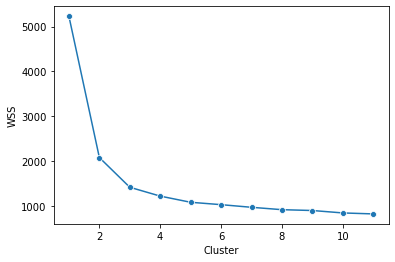

In [105]:
# ELBOW METHOD
wss = []
for k in range(1,12):
    kmeans = KMeans(n_clusters = k,init='k-means++',random_state=rs)
    kmeans.fit(X)
    wss.append(kmeans.inertia_)
clu = pd.DataFrame(wss,columns=['WSS'])
clu.index += 1
clu.index.names = ['Cluster']
sns.lineplot(x=clu.index,y=clu['WSS'],marker='o')

In [106]:
# SILHOUETTE METHOD (AVERAGES)
for i in range (2,13):
    print("Silhouette score from k(clusters) = " + str(i) + " is " + str(silhouette_score(X,KMeans(n_clusters=i,init='k-means++',random_state=rs).fit(X).labels_,metric='euclidean',random_state=rs)))

Silhouette score from k(clusters) = 2 is 0.4888471343460404
Silhouette score from k(clusters) = 3 is 0.37120741533942114
Silhouette score from k(clusters) = 4 is 0.3003902576803665
Silhouette score from k(clusters) = 5 is 0.2535805041404124
Silhouette score from k(clusters) = 6 is 0.22850632795478798
Silhouette score from k(clusters) = 7 is 0.2078664214068278
Silhouette score from k(clusters) = 8 is 0.21161275724863476
Silhouette score from k(clusters) = 9 is 0.20928769013341272
Silhouette score from k(clusters) = 10 is 0.19917072701712737
Silhouette score from k(clusters) = 11 is 0.19752508949588451
Silhouette score from k(clusters) = 12 is 0.20387778830337833


In [107]:
# SILHOUETTE METHOD (NEGATIVES CHECK)
bad_k_values = {}

for each_value in range(2,13):
    for each_silhouette in silhouette_samples(X,KMeans(n_clusters=each_value,init='k-means++',random_state=rs).fit(X).predict(X)):
        if each_silhouette < 0:
            if each_value not in bad_k_values:
                bad_k_values[each_value] = 1
            else:
                bad_k_values[each_value] += 1        
        if each_value not in bad_k_values:
            bad_k_values[each_value] = 0
                
for key, val in bad_k_values.items():
    print(f'This Many Clusters: {key} | Number of Negative Values: {val}')

This Many Clusters: 2 | Number of Negative Values: 3
This Many Clusters: 3 | Number of Negative Values: 1
This Many Clusters: 4 | Number of Negative Values: 20
This Many Clusters: 5 | Number of Negative Values: 13
This Many Clusters: 6 | Number of Negative Values: 24
This Many Clusters: 7 | Number of Negative Values: 20
This Many Clusters: 8 | Number of Negative Values: 15
This Many Clusters: 9 | Number of Negative Values: 16
This Many Clusters: 10 | Number of Negative Values: 23
This Many Clusters: 11 | Number of Negative Values: 30
This Many Clusters: 12 | Number of Negative Values: 16


In [108]:
# Elbow and Silhouette at k(Clusters) = 3 BEST

In [109]:
finalex = pd.concat([ex1,ex6,ex2,ex3,ex4,ex5,ex7,ex8,ex9])
finalex

LOW  \
Original                                           LOW           108.0   
                                                   MEDIUM         26.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 4 PICKED 9,11,10,5 (4 TOTAL ITEMS)   LOW           105.0   
                                                   MEDIUM         41.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 5 PICKED 9,11,10,5,8 (5 TOTAL ITEMS) LOW           107.0   
                                                   MEDIUM         27.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 6 PICKED 9,11,10,5,8,7 (6 TOTAL I... LOW           108.0   
                                                   MEDIUM         28.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
DS PRACTICAL PICK 14,12,11,10,8,4 (6 TOTAL ITEMS)  LOW           103.0   
                                                   MEDIUM         24.0   
                                                   HIGH            0.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 7 PICKED 9,11,10,5,8,7,6 (7 TOTAL... LOW           107.0   
                                                   MEDIUM          4.0   
                                                   HIGH            2.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 8 PICKED 9,11,10,5,8,7,6,12 (8 TO... LOW           108.0   
                                                   MEDIUM          5.0   
                                                   HIGH            2.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 9 PICKED 9,11,10,5,8,7,6,12,13 (9... LOW           108.0   
                                                   MEDIUM          7.0   
                                                   HIGH            2.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN   
HIGH CORR TOP 10 PICKED 9,11,10,5,8,7,6,12,13,4... LOW           108.0   
                                                   MEDIUM          7.0   
                                                   HIGH            1.0   
                                                   accuracy        NaN   
                                                   macro avg       NaN   
                                                   weighted avg    NaN 

In [110]:
finalex.to_excel(r'C:\Users\krunk\OneDrive\Documents\CPSC 597\Project Data\BBS Machine Learning Data Collection (K Means Clustering).xlsx',sheet_name='K Means Clustering')